In [18]:
# Import modules
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import modules for machine learning
from sklearn.model_selection import train_test_split
#from sklearn.tree import DecisionTreeClassifier, plot_tree
#from sklearn.linear_model import LogisticRegression
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.ensemble import RandomForestRegressor


In [3]:
tesla = pd.read_csv('TSLA.csv' , sep=',')
tesla


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2840,2021-10-08,796.210022,796.380005,780.909973,785.489990,785.489990,16711100
2841,2021-10-11,787.650024,801.239990,785.500000,791.940002,791.940002,14200300
2842,2021-10-12,800.929993,812.320007,796.570007,805.719971,805.719971,22020000
2843,2021-10-13,810.469971,815.409973,805.780029,811.080017,811.080017,14120100


In [4]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845 entries, 0 to 2844
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2845 non-null   object 
 1   Open       2845 non-null   float64
 2   High       2845 non-null   float64
 3   Low        2845 non-null   float64
 4   Close      2845 non-null   float64
 5   Adj Close  2845 non-null   float64
 6   Volume     2845 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 155.7+ KB


In [5]:
tesla.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
# Date is of an object type, need it to be of type datetime
tesla['Date'] = pd.to_datetime(tesla['Date'])

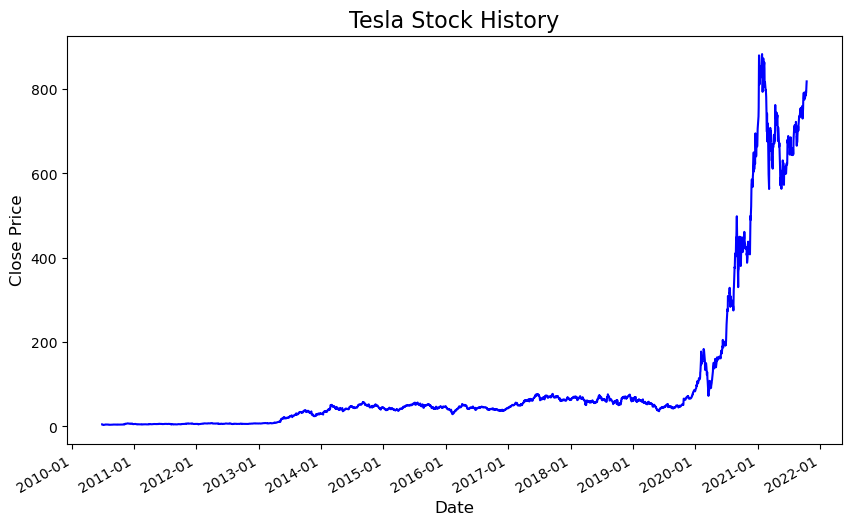

In [7]:
#Visualizing the data

plt.figure(figsize=(10, 6))
plt.plot(tesla['Date'], tesla['Close'], color='blue')

plt.title('Tesla Stock History', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price', fontsize=12)

# Formatér datoaksen for å rotere datoene
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))
plt.gcf().autofmt_xdate()

# Vis plottet
plt.show()



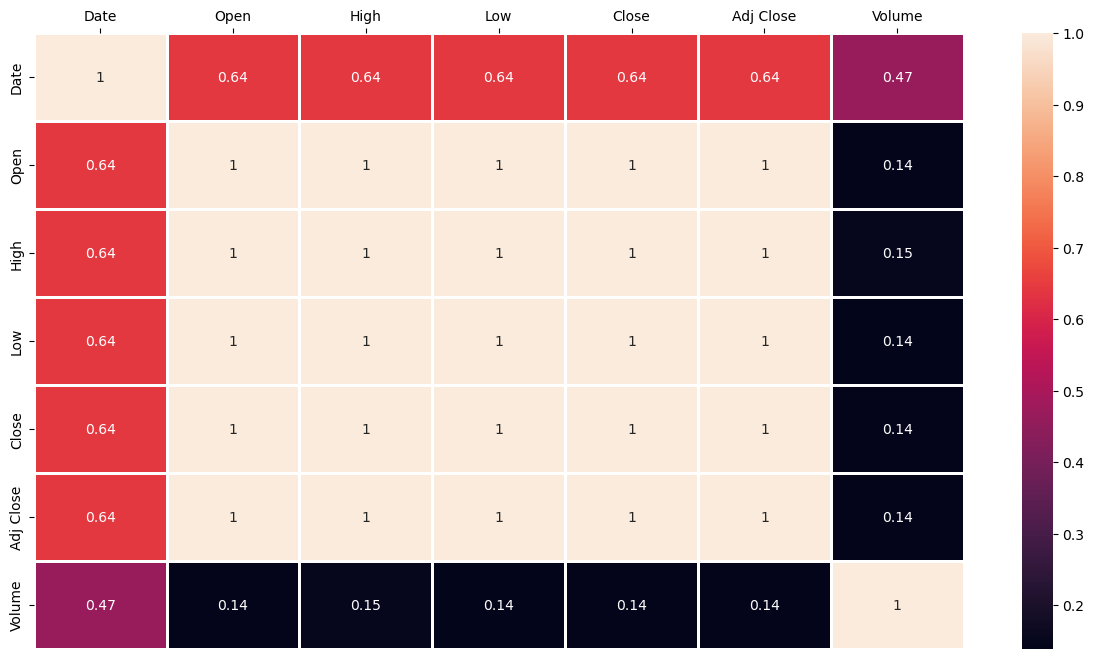

In [8]:
# Correlation matrix
plt.figure(figsize=(15,8))
sns.heatmap(tesla.corr(), annot=True, linewidths=2)
plt.gca().xaxis.tick_top()  
plt.show()


In [9]:
tesla['Date_ordinal'] = tesla['Date'].apply(lambda x: x.toordinal())

X = pd.DataFrame(tesla['Date_ordinal'])
y = pd.DataFrame(tesla['Close'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape, X_test.shape)

(1991, 1) (854, 1)


In [10]:
# Tren modellen på treningsdataene

model_regression_not = LinearRegression()
model_regression_not.fit(X_train, y_train)

# Getting the predictions   
y_pred = model_regression_not.predict(X_test)

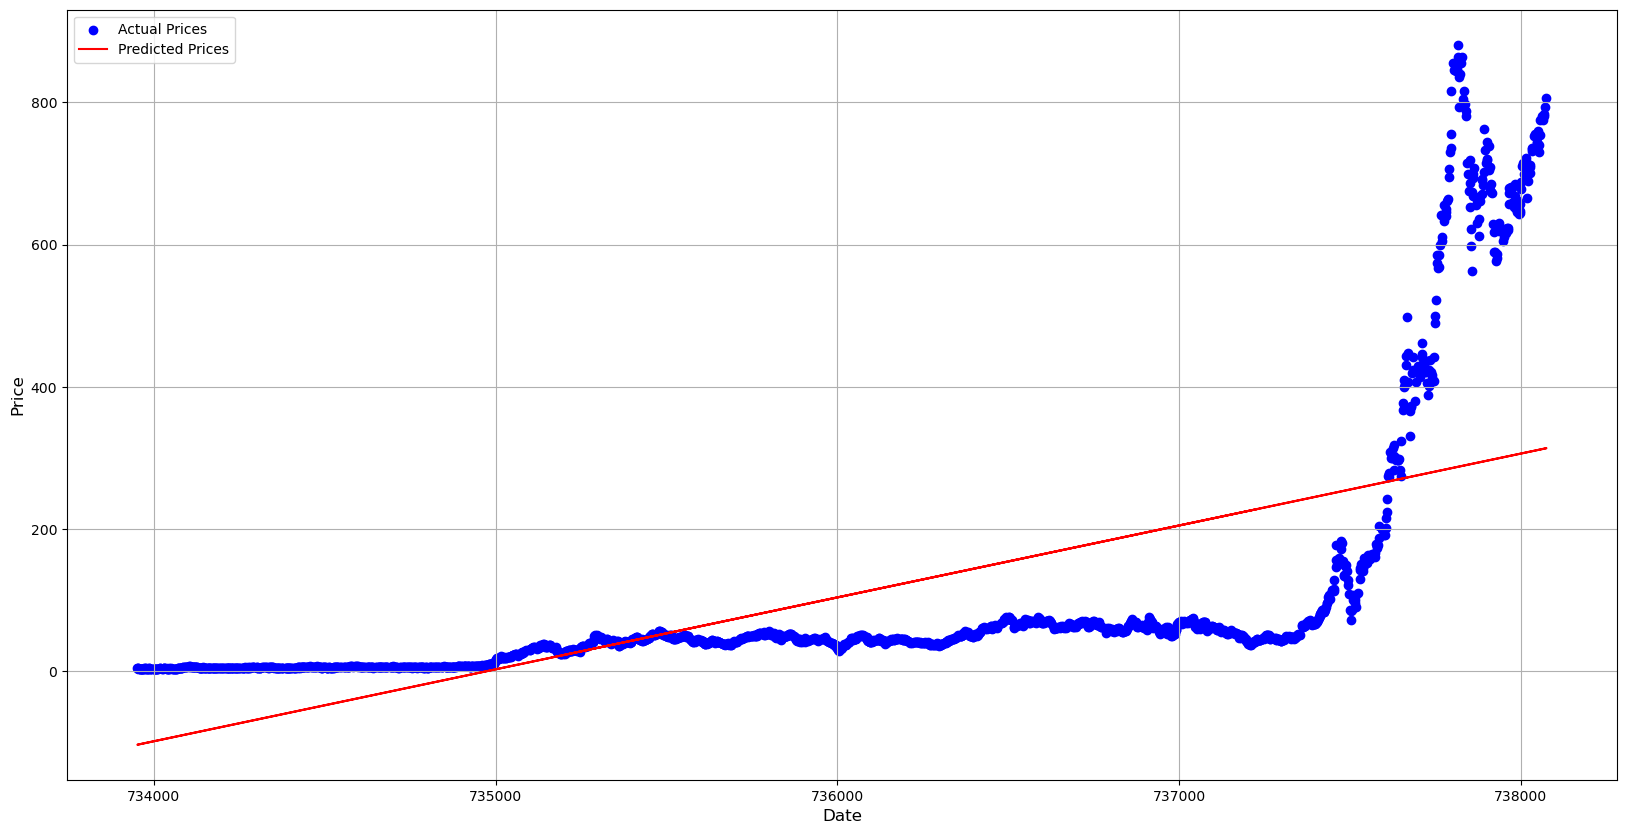

In [11]:
plt.figure(figsize =(20,10))

plt.scatter(X_train, y_train, color='blue', label='Actual Prices')

plt.plot(X_train, model_regression_not.predict(X_train), color='red', label='Predicted Prices')

plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)

plt.legend()
plt.grid(True)
plt.show()

In [12]:
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Accuracy Score for Test Data: {score:.2f}")

Mean Squared Error (MSE): 21439.15
Accuracy Score for Test Data: 0.41


The graph shows a significant surge in Tesla's stock beginning in 2020 onwards, which stands in stark contrast to the slower, more gradual growth of previous years. 
The fluctuation of the stock market from 2020 to the present provides a more suitable and accurate measurement for analysis, compared to using the entire timeline.

In [13]:
#tesla_filtered['Date'] = tesla_filtered['Date'].apply(lambda x: x.toordinal())

# Filter the data from 2020 onwards
tesla_filtered = tesla[tesla['Date'].dt.year >= 2020]

tesla_filtered.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Date_ordinal
2394,2020-01-02,84.900002,86.139999,84.342003,86.052002,86.052002,47660500,737426
2395,2020-01-03,88.099998,90.800003,87.384003,88.601997,88.601997,88892500,737427
2396,2020-01-06,88.094002,90.311996,88.000000,90.307999,90.307999,50665000,737430
2397,2020-01-07,92.279999,94.325996,90.671997,93.811996,93.811996,89410500,737431
2398,2020-01-08,94.739998,99.697998,93.646004,98.428001,98.428001,155721500,737432


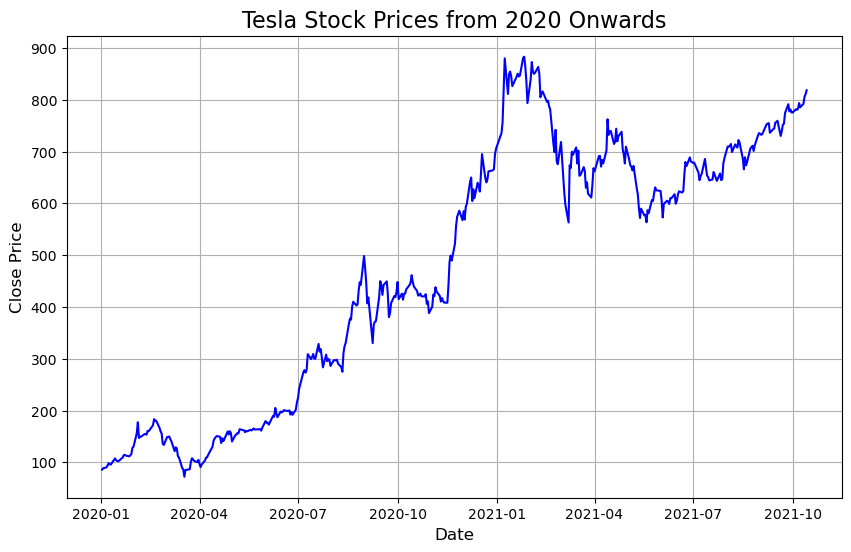

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(tesla_filtered['Date'], tesla_filtered['Close'], color='blue')

plt.title('Tesla Stock Prices from 2020 Onwards', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price', fontsize=12)

plt.grid(True)
plt.show()

In [36]:
# Convert the 'Date_ordinal' column to a DataFrame
X = tesla_filtered[['Date_ordinal']]  # X as a DataFrame with a single column
y = tesla_filtered['Close']  # y as a Series containing the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the dimensions of the training and test sets
print(X_train.shape, X_test.shape)  # Check the shape of the training and test sets

(315, 1) (136, 1)


In [34]:
# Tren modellen på treningsdataene

model_regression = LinearRegression()
model_regression.fit(X_train, y_train)

# Getting the predictions   
y_pred = model_regression.predict(X_test)


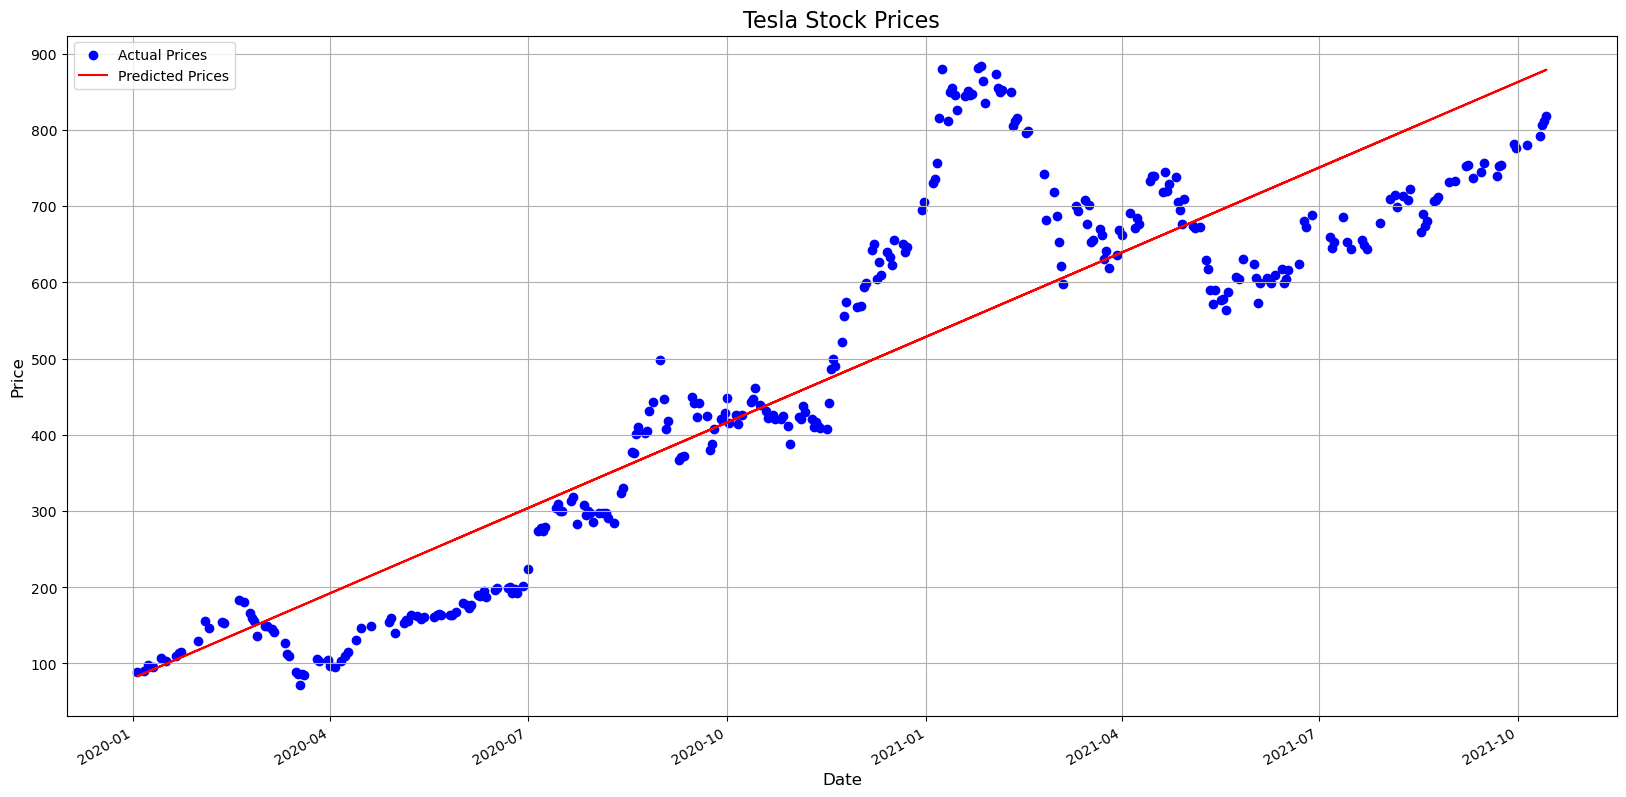

In [37]:
# Convert 'Date_ordinal' back to datetime format for visualization
X_train_dates = X_train['Date_ordinal'].map(pd.Timestamp.fromordinal)
X_test_dates = X_test['Date_ordinal'].map(pd.Timestamp.fromordinal)

# Plotting
plt.figure(figsize=(20,10))

plt.scatter(X_train_dates, y_train, color='blue', label='Actual Prices')
plt.plot(X_train_dates, model_regression.predict(X_train), color='red', label='Predicted Prices')

plt.title('Tesla Stock Prices', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)

plt.legend()
plt.grid(True)
plt.gcf().autofmt_xdate()  # Rotate date labels for better readability
plt.show()


In [458]:
#Show the measurement for the prediction model
 
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Accuracy Score for Test Data: {score:.2f}")


Mean Squared Error (MSE): 8103.22
Accuracy Score for Test Data: 0.88


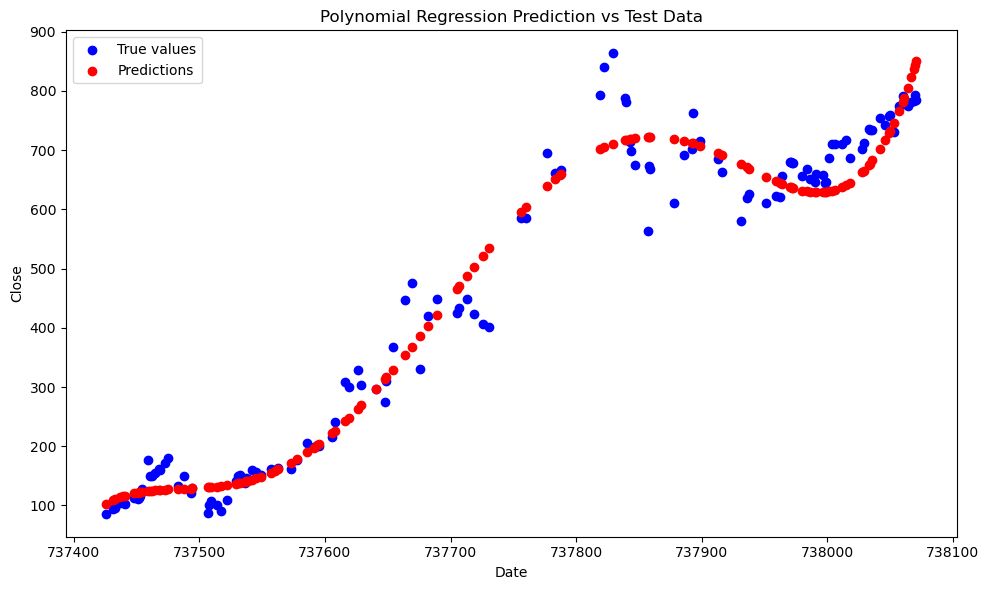

In [459]:

model = Pipeline ([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=5)),
    ('linear', LinearRegression())
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(X_test['Date'], y_test, color='blue', label='True values')
plt.scatter(X_test['Date'], y_pred, color='red', label='Predictions')
plt.legend()

x_ticks = np.arange(min(X['Date']), max(X['Date']), (max(X['Date'])-min(X['Date'])))
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Polynomial Regression Prediction vs Test Data')
plt.tight_layout()
plt.show()


In [462]:
#Show the measurement for the prediction model
 
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Accuracy Score for Test Data: {score:.2f}")




Mean Squared Error (MSE): 2241.12
Accuracy Score for Test Data: 0.97


In [ ]:
#Extra

In [23]:
# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_rf_pred = rf_model.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, y_rf_pred)
rf_r2 = r2_score(y_test, y_rf_pred)

print(f'Random Forest Mean Squared Error: {rf_mse}')
print(f'Random Forest R² Score: {rf_r2}')

Random Forest Mean Squared Error: 40.36947118391879
Random Forest R² Score: 0.9988920427036667


Random Forest Mean Squared Error: 40.36947118391879
Random Forest R² Score: 0.9988920427036667


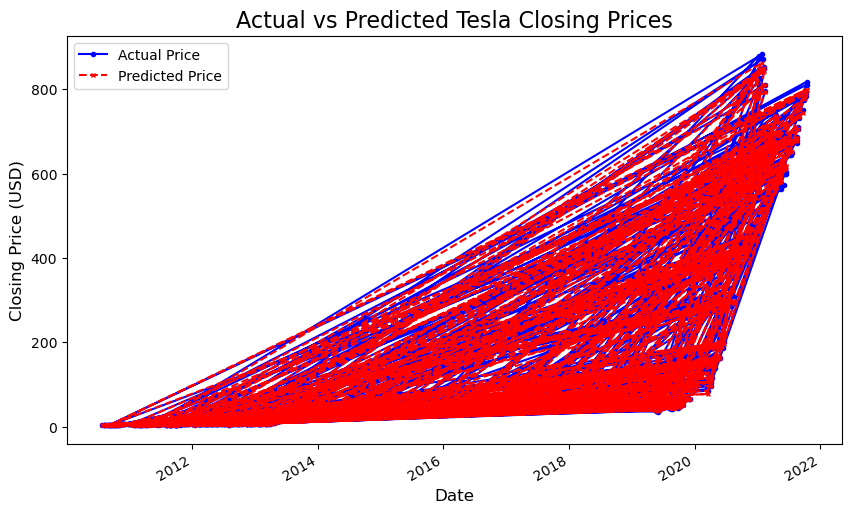

In [22]:
# Convert the 'Date' column to datetime format and extract year, month, and day
tesla['Date'] = pd.to_datetime(tesla['Date'])  # Convert 'Date' to datetime format
tesla['Year'] = tesla['Date'].dt.year  # Extract the year
tesla['Month'] = tesla['Date'].dt.month  # Extract the month
tesla['Day'] = tesla['Date'].dt.day  # Extract the day


# Convert the 'Date' column to ordinal format and add it as a new column
tesla['Date_ordinal'] = tesla['Date'].map(pd.Timestamp.toordinal)

# Specify features
X = tesla[['Date_ordinal', 'Year', 'Month', 'Day']]  # Features for the model
y = tesla['Close']  # Target variable

# Split into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_rf_pred = rf_model.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, y_rf_pred)
rf_r2 = r2_score(y_test, y_rf_pred)

print(f'Random Forest Mean Squared Error: {rf_mse}')
print(f'Random Forest R² Score: {rf_r2}')

# For visualizing the dates
X_test_dates = pd.Series(X_test['Date_ordinal']).map(pd.Timestamp.fromordinal)

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(X_test_dates, y_test, label='Actual Price', color='blue',marker='o', markersize=3)
plt.plot(X_test_dates, y_rf_pred, label='Predicted Price', color='red', linestyle='--', marker='x', markersize=3)
plt.title('Actual vs Predicted Tesla Closing Prices', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price (USD)', fontsize=12)
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

## **Assignment Description**:

* Tesla-Stock-Price-Prediction- Make a prediction algorithm which predicts the price of this stock on a specific date. Input will be date and output should be price of that stock (close value in the data file).
You should also show the prediction percentage score.

* Explore and research which algorithm would work best for this use case (regression or classification)  
We used the refrasjon algorithm. Because we needed to make inferences about future prices based on the data we had so far. When it comes to prediction, the regression algorithm is more appropriate.


Gülnur Yildiz- s374961 
Somayeh Fattahi- s371482 
Nasima Josefi- s354388 
Rayan Nabaz Kanabi- s375057

#Questions:

How well does your model perform?
Initially, our Linear Regression model had a high Mean Squared Error (MSE) of 21,439.15 and an R² Score of 0.41, indicating poor predictive ability. After filtering out Tesla's earlier, less volatile prices and switching to polynomial regression, the results improved. However, the Random Forest algorithm yielded the best performance with an MSE of 40.37 and an R² Score of 0.999, explaining nearly all the variance in Tesla's closing prices. This marks a significant improvement and highlights the effectiveness of the Random Forest model.

Are there any improvements you can make?
Although the Random Forest model performed exceptionally well, further refinement could include trying even more advanced algorithms like XGBoost. Expanding the dataset and incorporating additional features, such as external market data or economic indicators, might further improve the accuracy of predictions.

What happens if you remove features and predict again?
Since the Random Forest model already relies on important features, removing them could reduce its predictive performance. However, if additional data is included, we could identify and exclude irrelevant features, potentially improving the model's accuracy by reducing overfitting. For instance, filtering out Tesla's pre-2020 prices, which were less volatile, proved to enhance model performance as these earlier prices dragged predictions lower.

Reference :
Microsoft. (2024, August 28). What is automated machine learning (AutoML)? Microsoft Learn. https://learn.microsoft.com/en-us/azure/machine-learning/concept-automated-ml?view=azureml-api-2 